In [ ]:
! pip install pandas
! pip install seaborn
! pip install matplotlib


# Data-Importing

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# Set matplotlib parameters
plt.rcParams.update({
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 25,
    "axes.titleweight": "bold",
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "axes.labelsize": 20,
    "legend.fontsize": 15,
    "legend.title_fontsize": 15
})

# Set seaborn style
sns.set_theme(style="whitegrid")

In [3]:
# Read the CSV file
df = pd.read_csv('day.csv')



# Obsevations 

In [4]:
# Display first few rows
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [16]:
df.describe(include = 'all').T

count         mean          std        min          25%  \
instant     731.0   366.000000   211.165812   1.000000   183.500000   
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
holiday     731.0     0.028728     0.167155   0.000000     0.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
workingday  731.0     0.683995     0.465233   0.000000     0.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
atemp       731.0     0.474354     0.162961   0.079070     0.337842   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   
Date        731.0    15.738714     8.809949   1.000000     8.000000   

                    50%          75%          max  
instant      366.000000   548.500000   731.000000  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
atemp          0.486733     0.608602     0.840896  
hum            0.626667     0.730209     0.972500  
windspeed      0.180975     0.233214     0.507463  
cnt         4548.000000  5956.000000  8714.000000  
Date          16.000000    23.000000    31.000000

In [8]:
# Check columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data cleaning

In [9]:
# Change The datatype of Date columns so  further we can analyze the Bike rentals with respect to year months and days.
df['dteday'] = df['dteday'].astype('datetime64[ns]')

In [10]:
# Creating new columns Date.

df['Date'] = df['dteday'].dt.day

In [11]:
# Now We can Drop dteday
df.drop("dteday",axis=1 ,inplace=True)

In [12]:
df.drop(['casual', 'registered' , 'temp'],axis=1 ,inplace=True)

In [13]:
#Get distinct categories counts forSeasons categories
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [14]:
# checking Duplicate rows in our BikeData.
duplicates = df.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis

In [15]:
# create numeric columns list.
numeric_features = df.describe().columns
numeric_features

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'Date'],
      dtype='object')

In [17]:
# create categorical column list
categorical_columns = list(set(df.columns) - set(numeric_features))
categorical_columns

[]

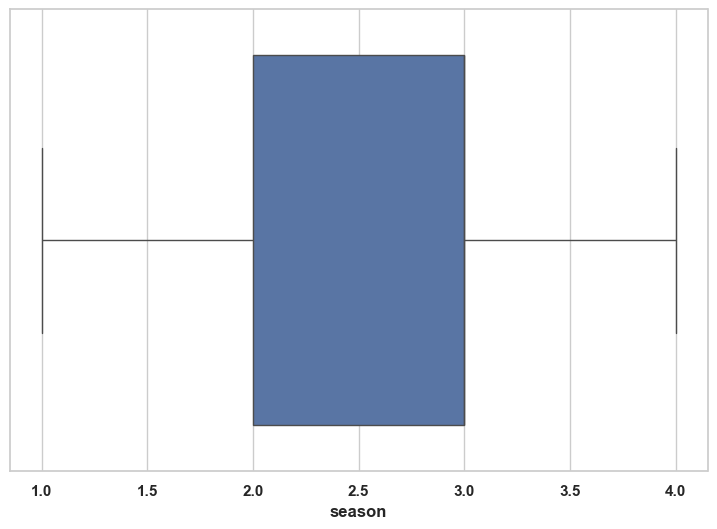

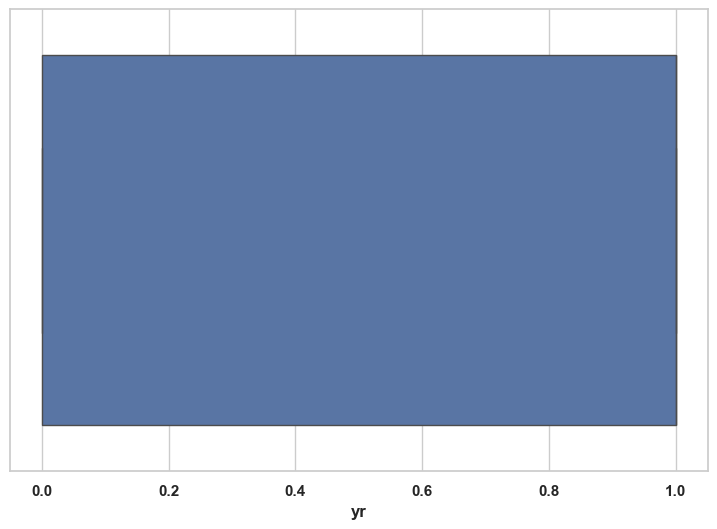

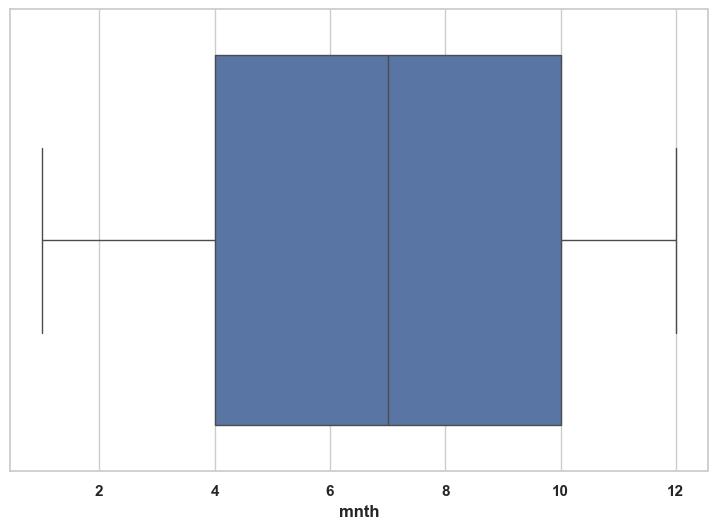

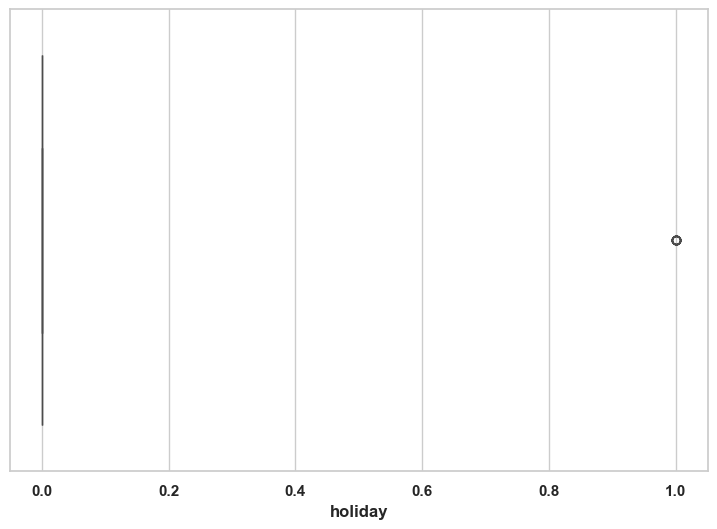

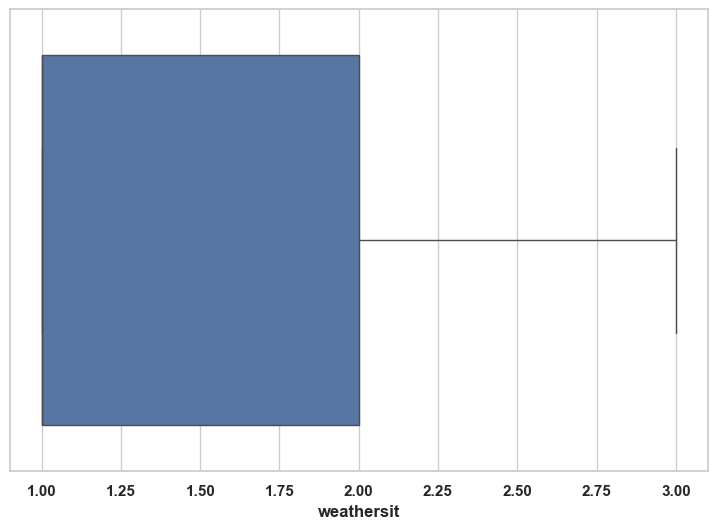

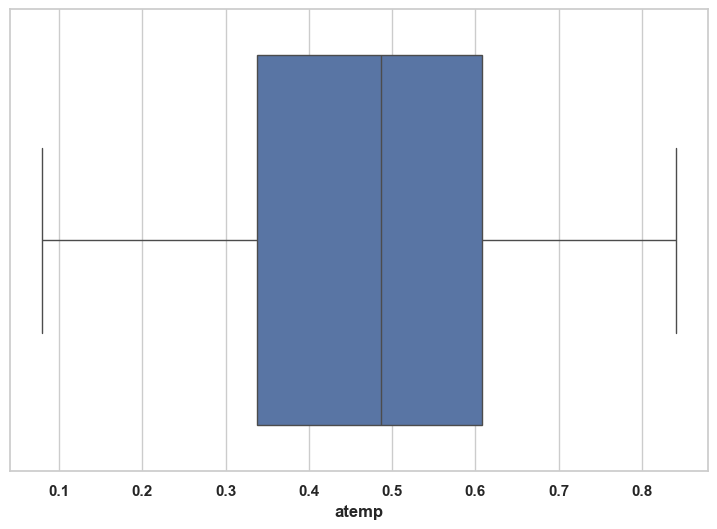

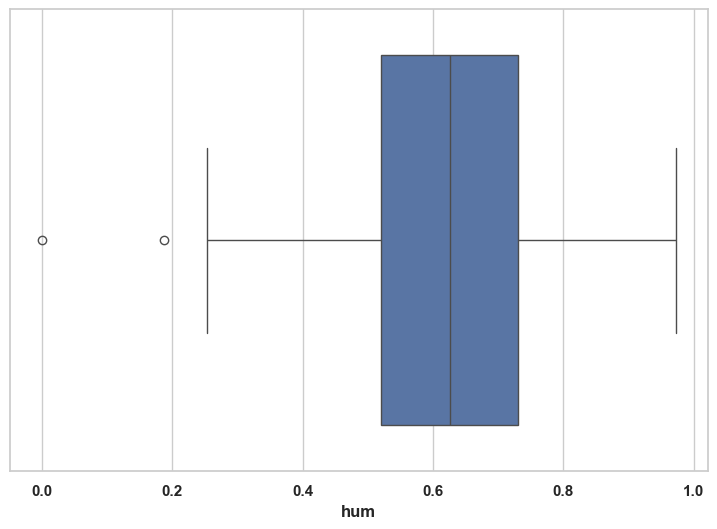

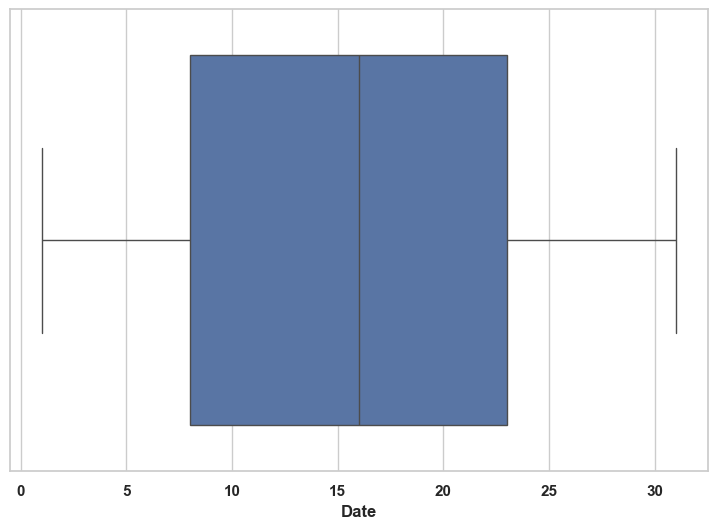

In [18]:
# plotting box plot of numeric columns to check oultliers
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

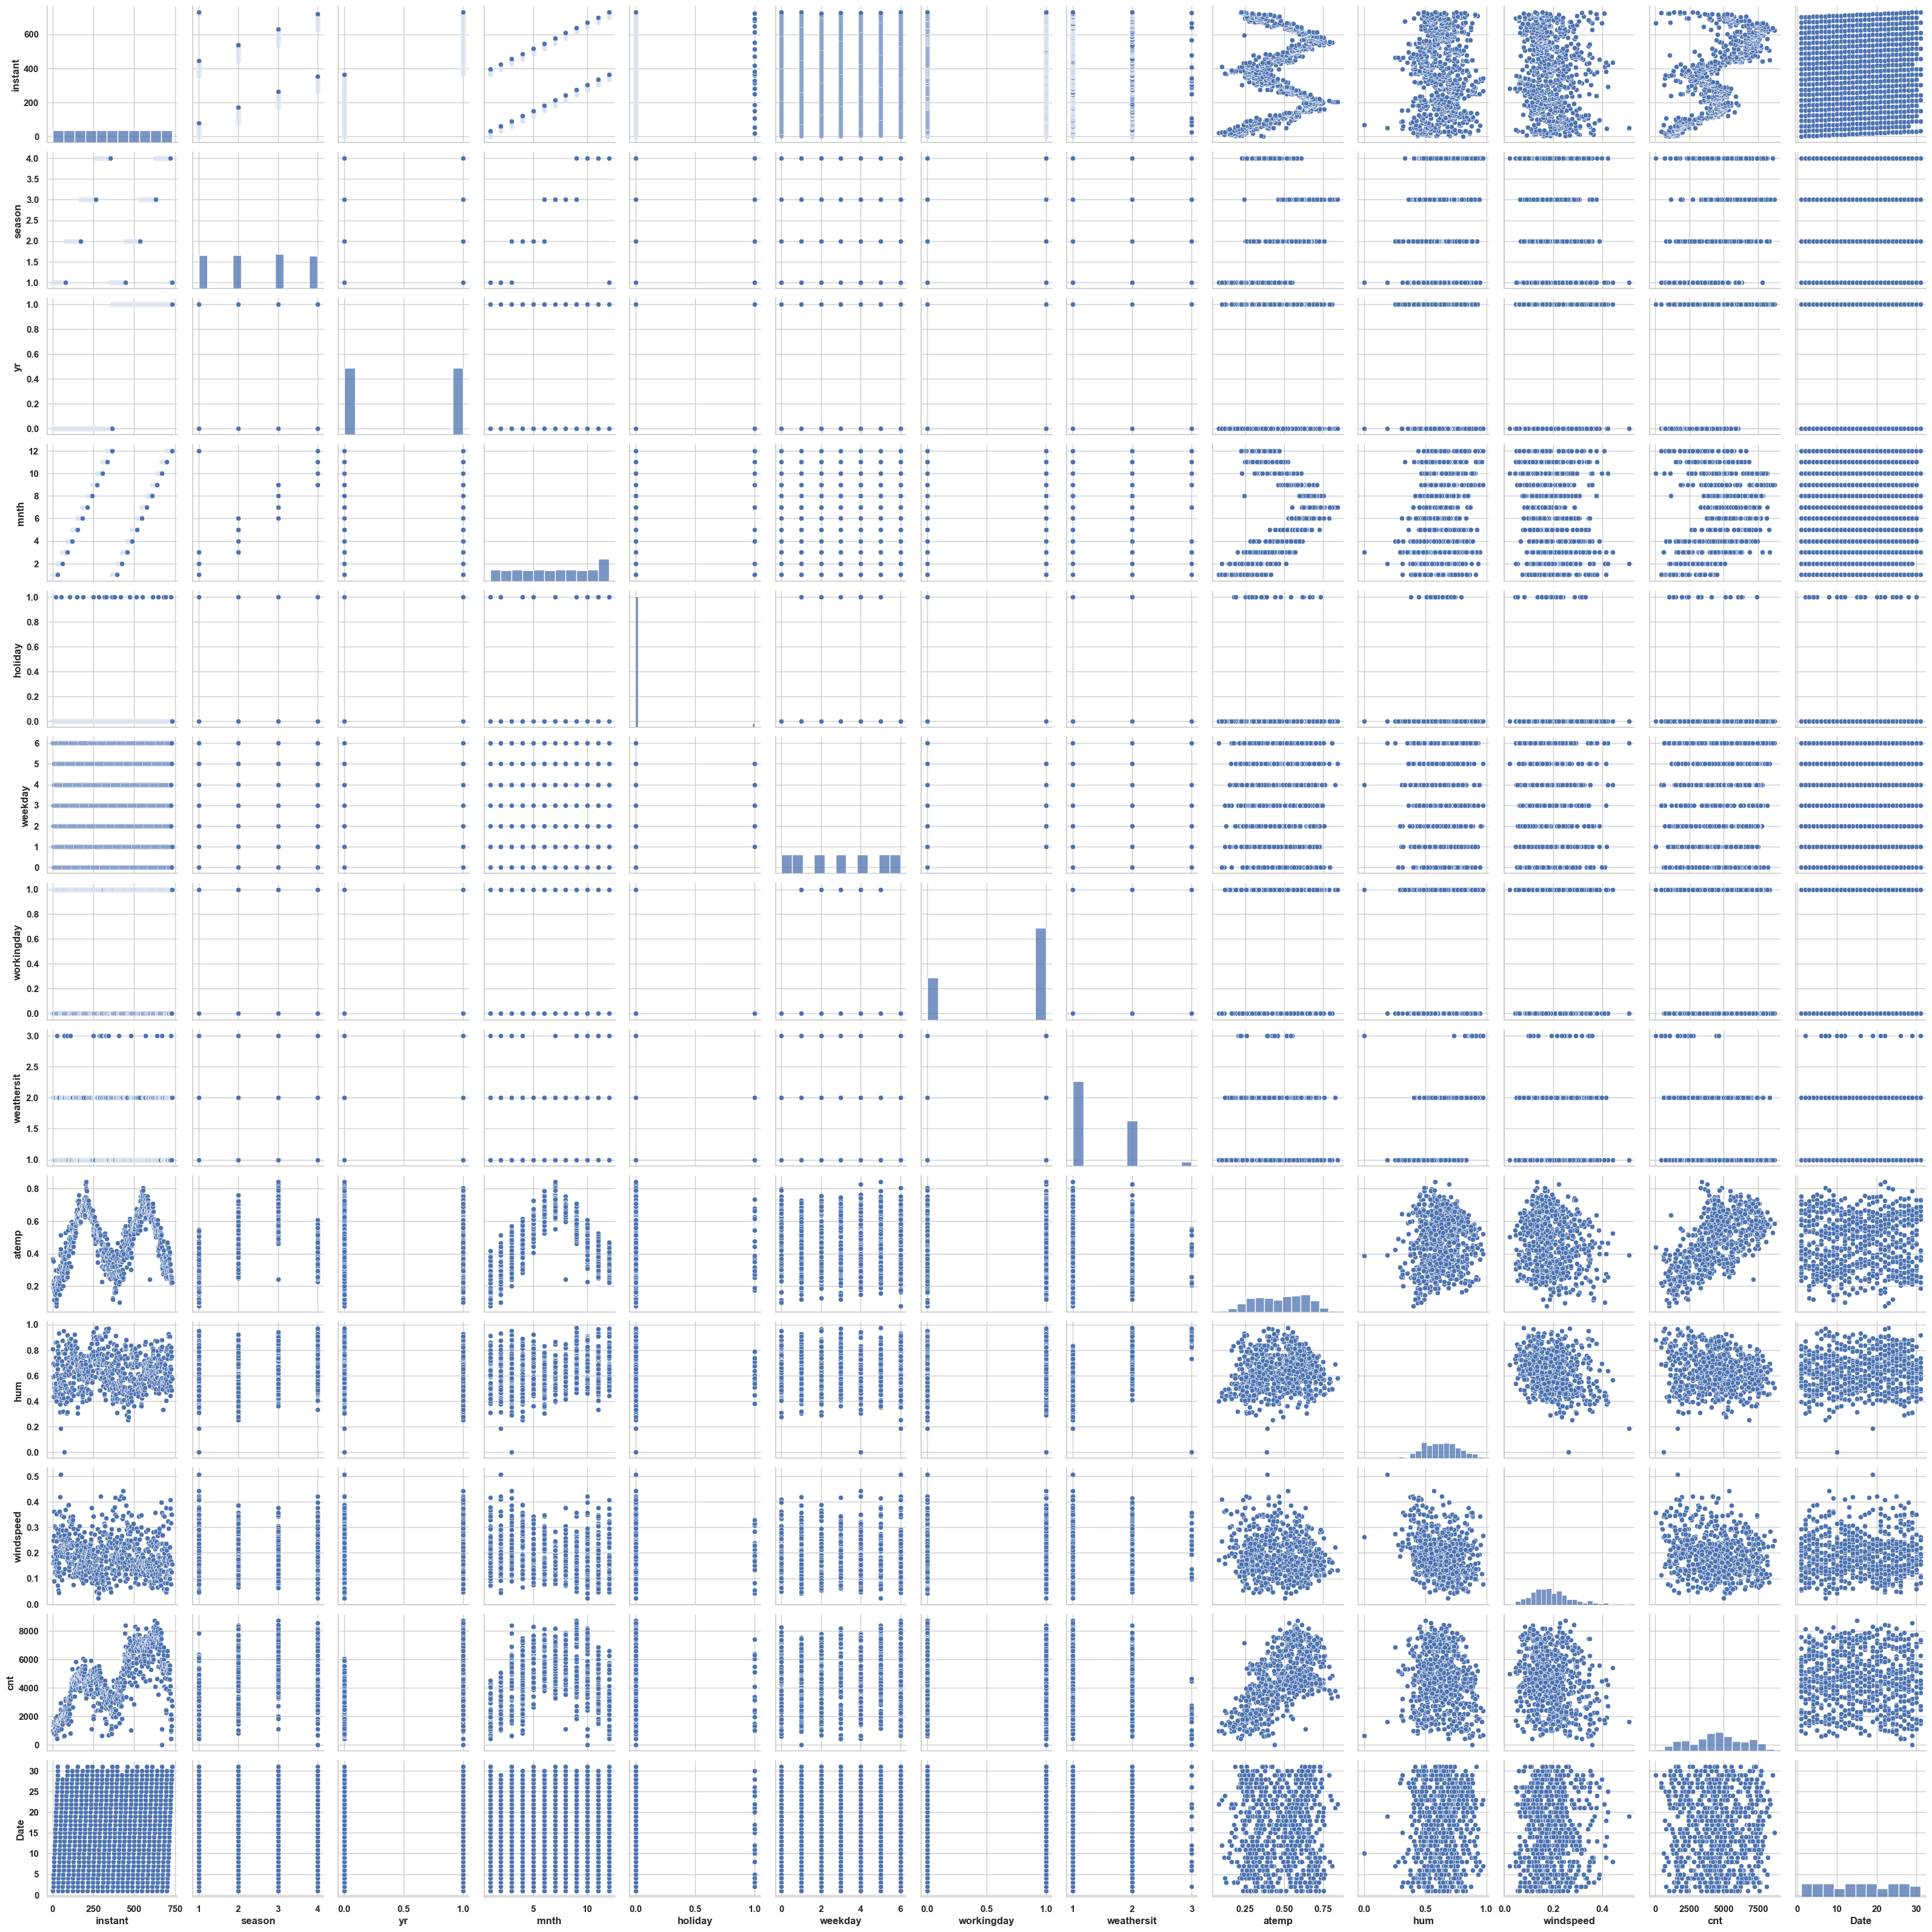

In [19]:
sns.pairplot(df)

Text(0.5, 1.0, 'Bike Rental Trend according to month')

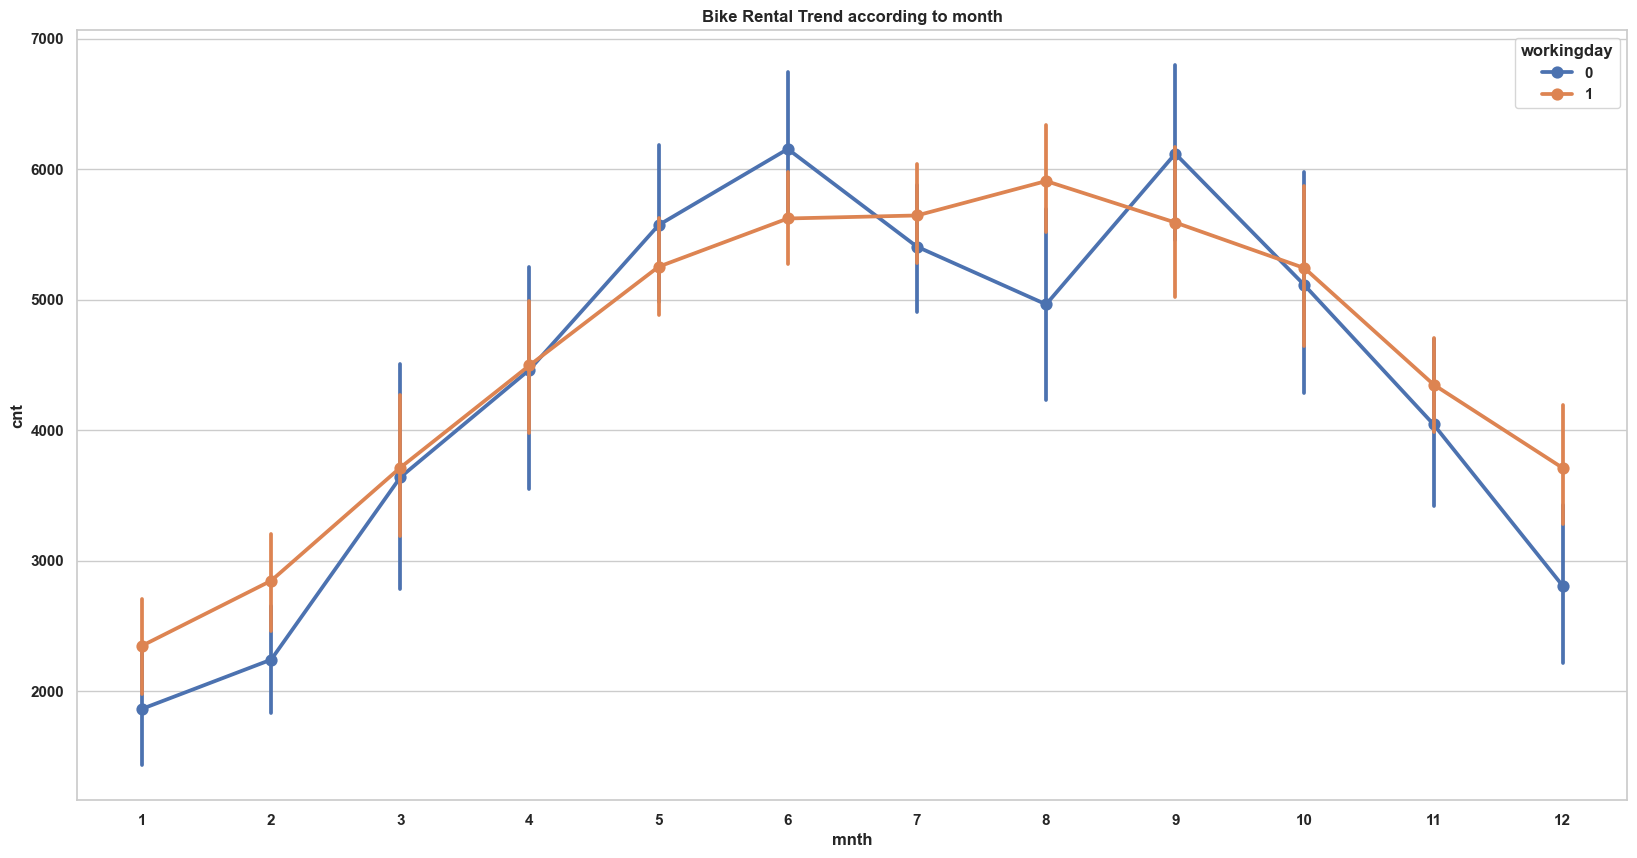

In [20]:
# Bike Rental trend with respect to month on working day.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['mnth'],y = df['cnt'],hue = df['workingday'])
plt.title("Bike Rental Trend according to month")

Text(0.5, 1.0, 'Bike Rental Trend according to season on Workingday')

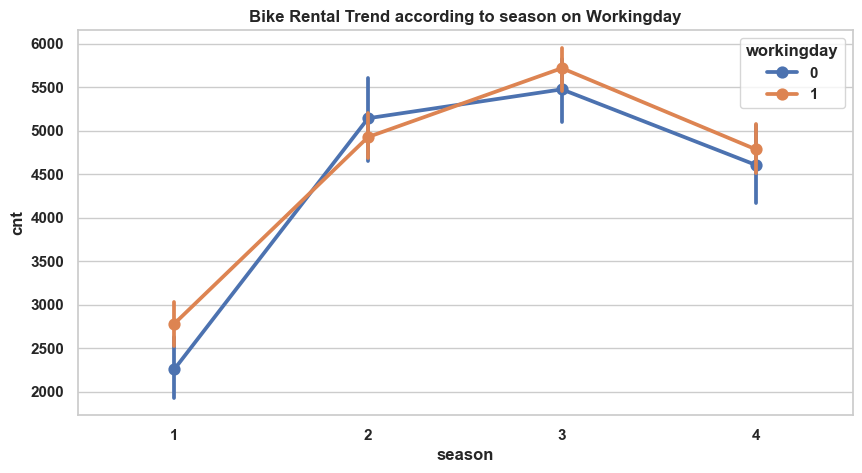

In [21]:
plt.figure(figsize=(10,5))
sns.pointplot(x = df['season'],y = df['cnt'],hue = df['workingday'])
plt.title("Bike Rental Trend according to season on Workingday")

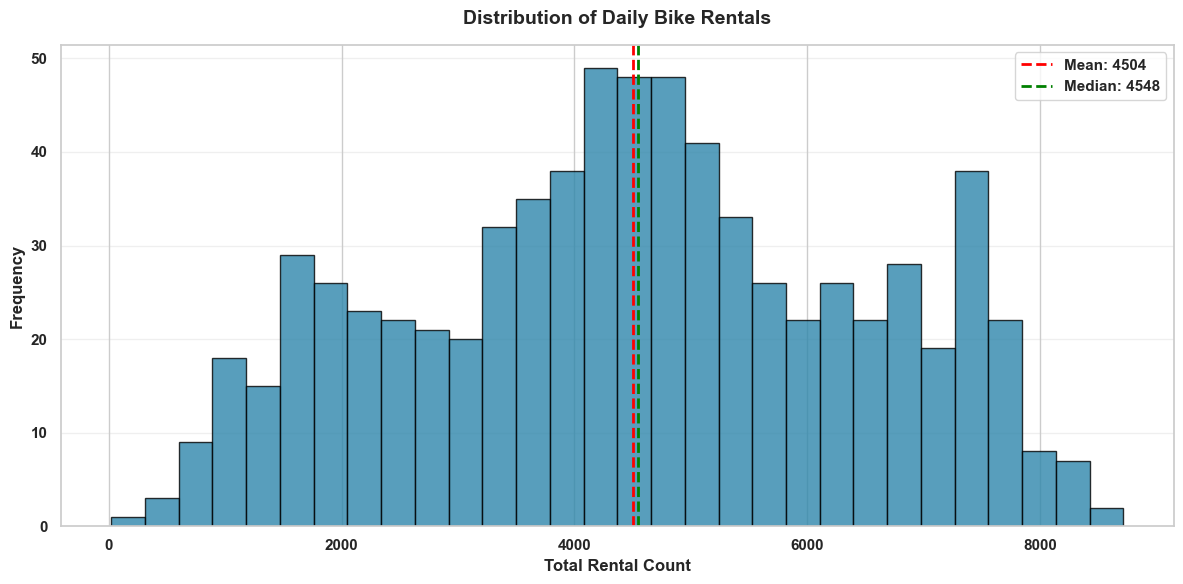

In [22]:
# Distribution of total bike rentals
plt.figure(figsize=(12, 6))
plt.hist(df['cnt'], bins=30, color='#2E86AB', alpha=0.8, edgecolor='black')
plt.axvline(df['cnt'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["cnt"].mean():.0f}')
plt.axvline(df['cnt'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["cnt"].median():.0f}')
plt.title('Distribution of Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Total Rental Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

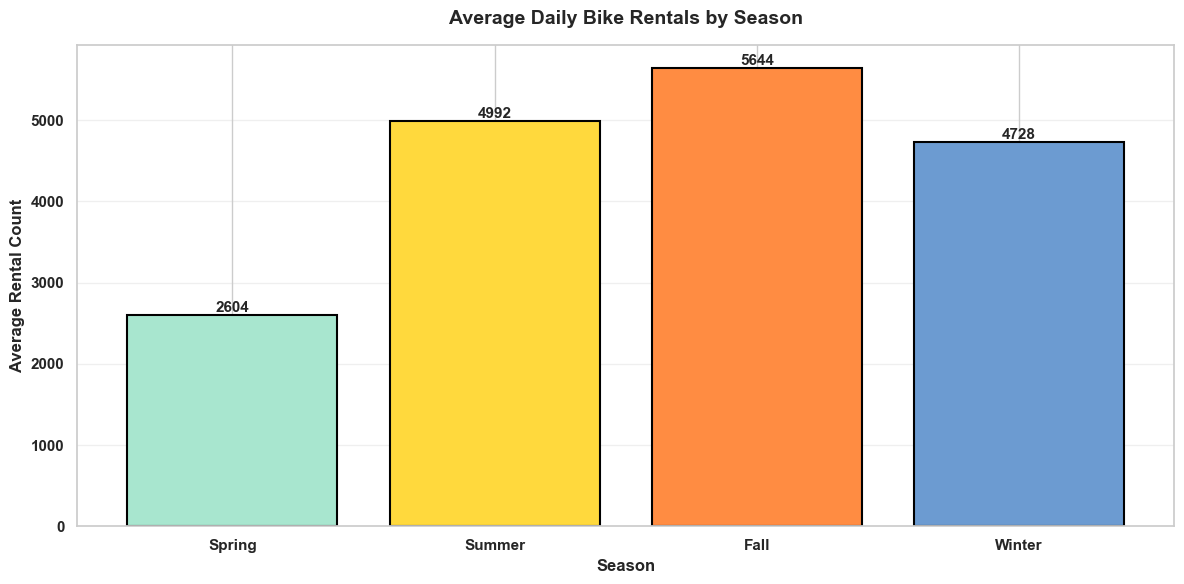

In [23]:
# Seasonal analysis
plt.figure(figsize=(12, 6))
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_map)
season_data = df.groupby('season_name')['cnt'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])
colors = ['#A8E6CF', '#FFD93D', '#FF8C42', '#6C9BD1']
bars = plt.bar(season_data.index, season_data.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Average Daily Bike Rentals by Season', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rental Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
	
# Working day vs non-working day
plt.figure(figsize=(12, 6))
workday_data = df.groupby('workingday')['cnt'].mean()
labels = ['Non-Working Day', 'Working Day']
colors = ['#FF6B6B', '#4ECDC4']
bars = plt.bar(labels, workday_data.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Average Daily Bike Rentals: Working vs Non-Working Days', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Average Rental Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Observation :

Clear weather - highest rentals; Rain - lowest rentals.

Bad weather decreases demand in all seasons.

Weather condition is a strong factor affecting rentals.

Working days show consistent, higher rentals.

Non-working days show smaller peaks on weekends.

# Distrubion of Target Variable

In [25]:

# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='b',ax=axes[0])
sns.boxplot(x = df['cnt'],color='b',ax=axes[1])

<Axes: xlabel='cnt'>

<Axes: xlabel='cnt'>

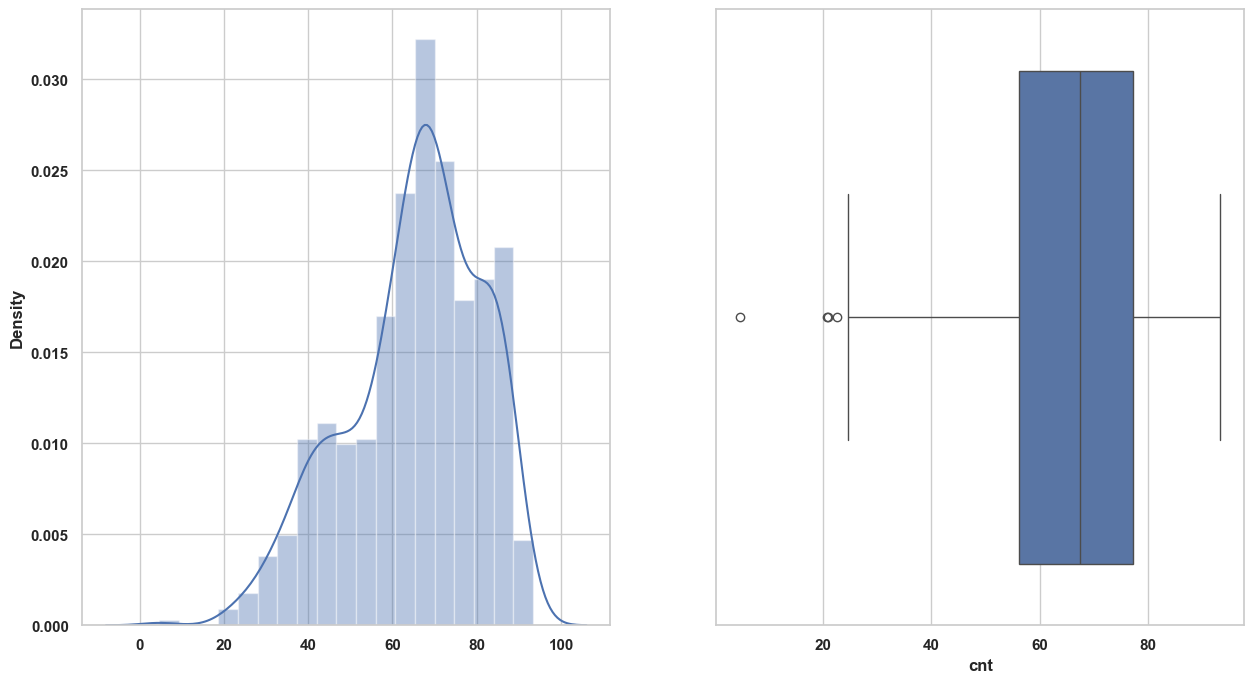

In [26]:
# Normalizing  our target variable by squre root method
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(df['cnt']),color='b',ax=axes[0])
sns.boxplot(x = np.sqrt(df['cnt']),color='b',ax=axes[1])

# Univariate Analysis

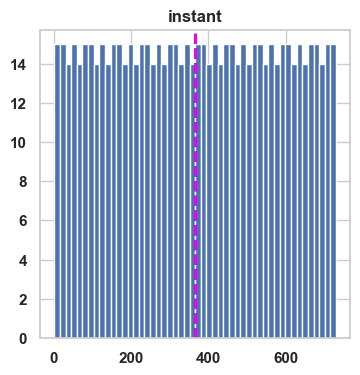

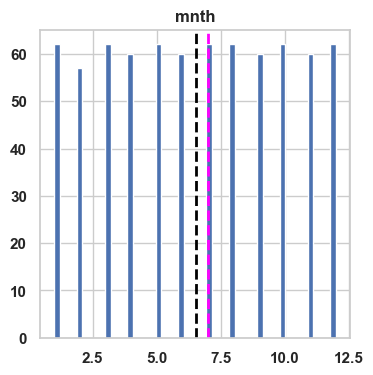

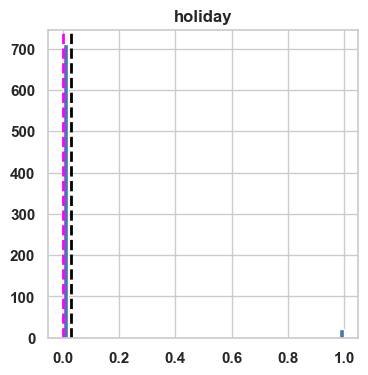

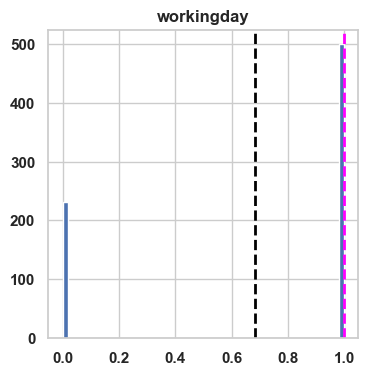

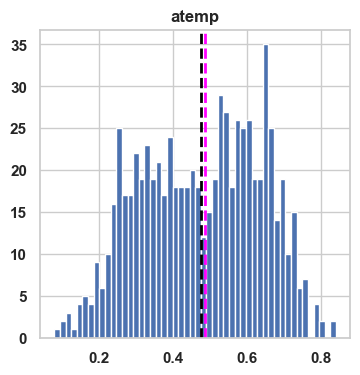

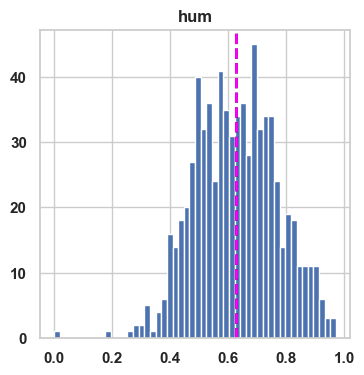

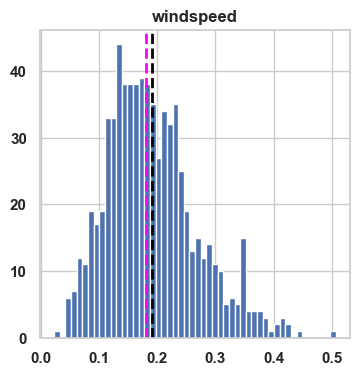

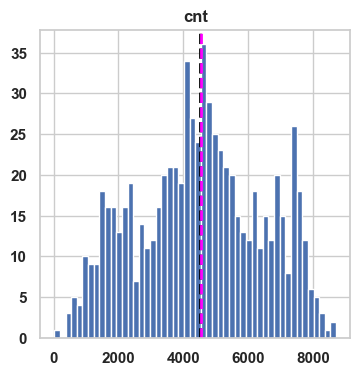

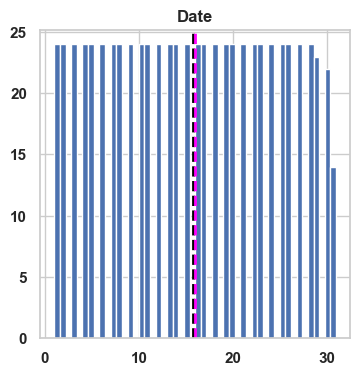

In [27]:
for col in numeric_features:
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

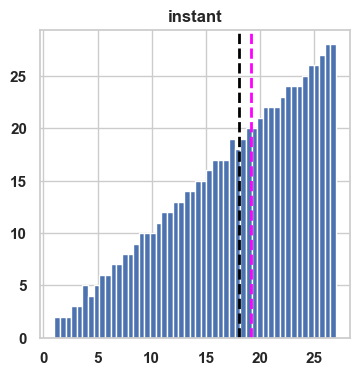

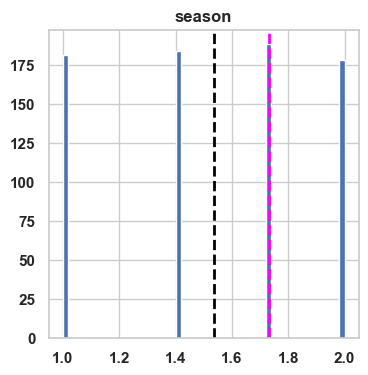

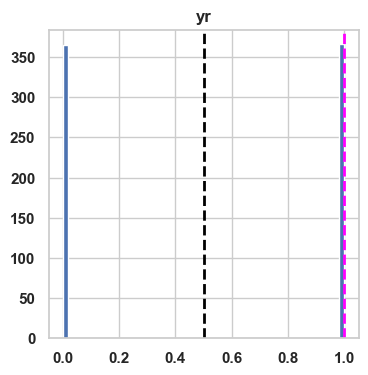

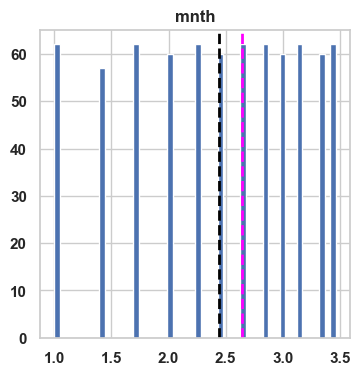

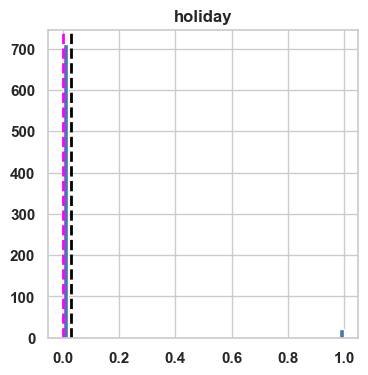

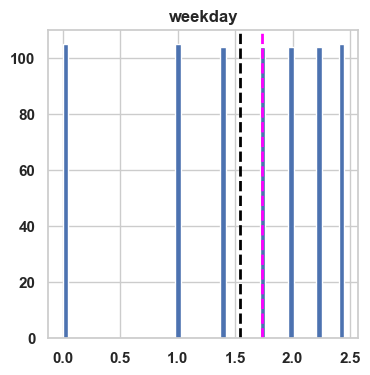

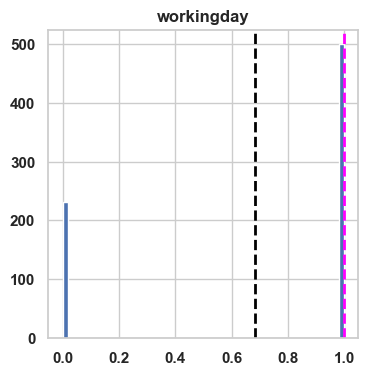

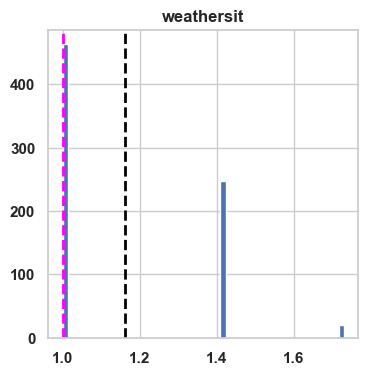

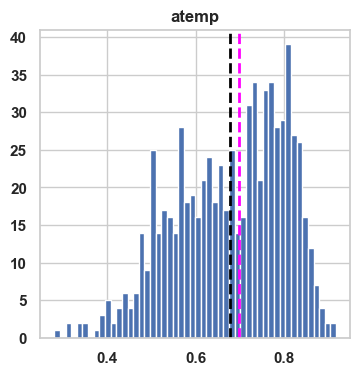

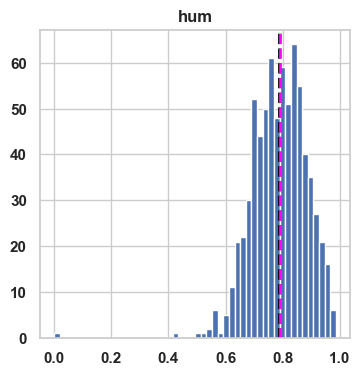

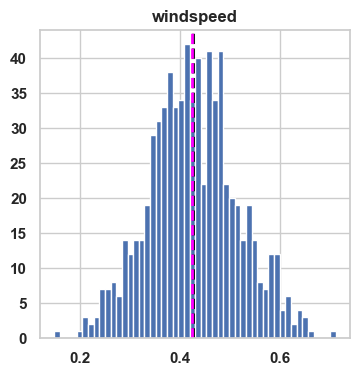

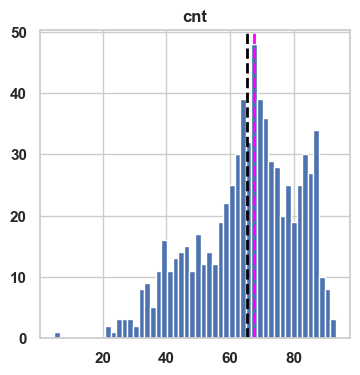

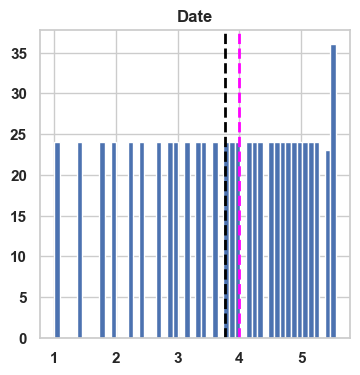

In [28]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

# Bivariate Analysis

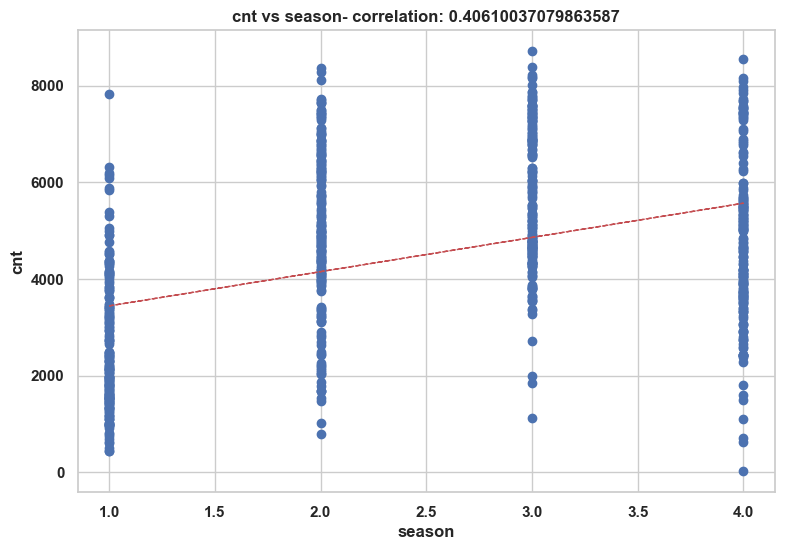

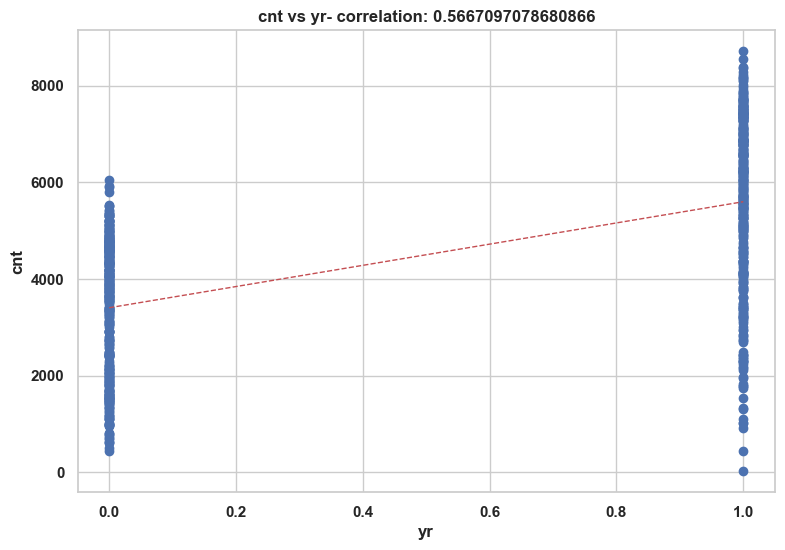

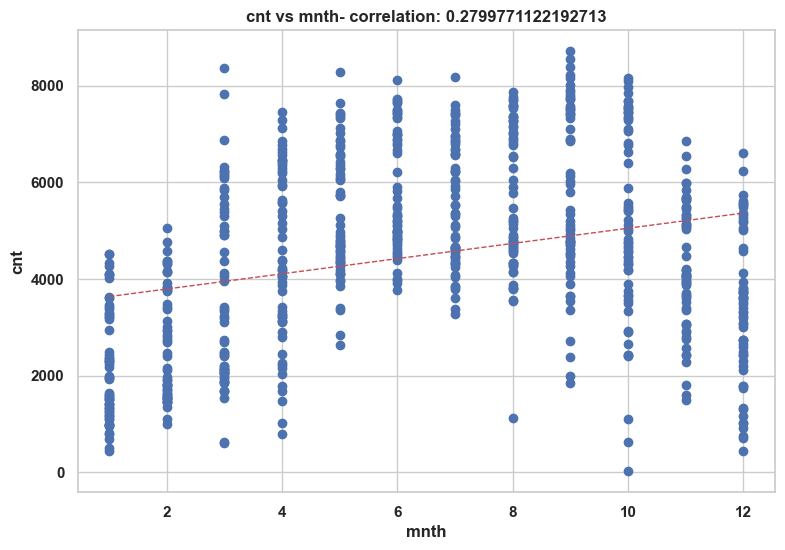

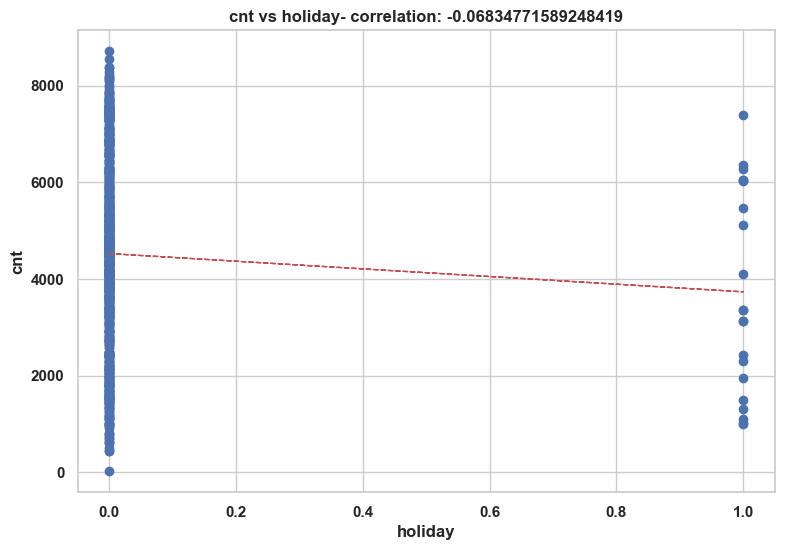

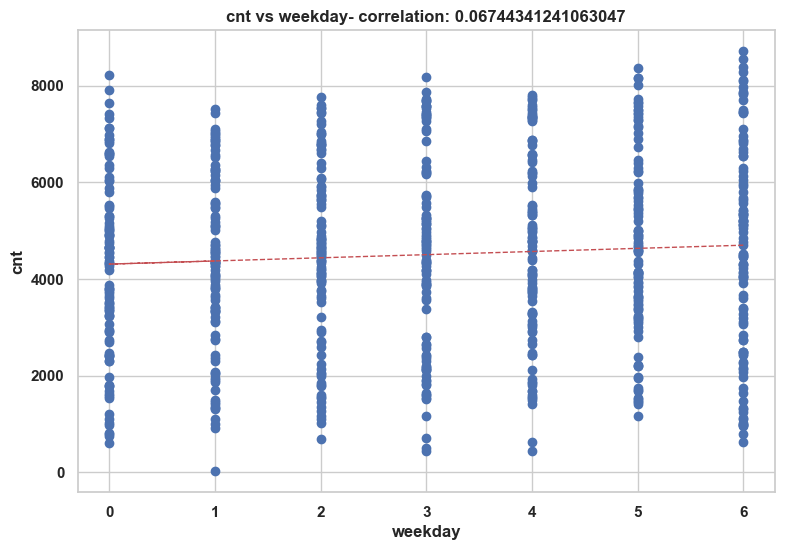

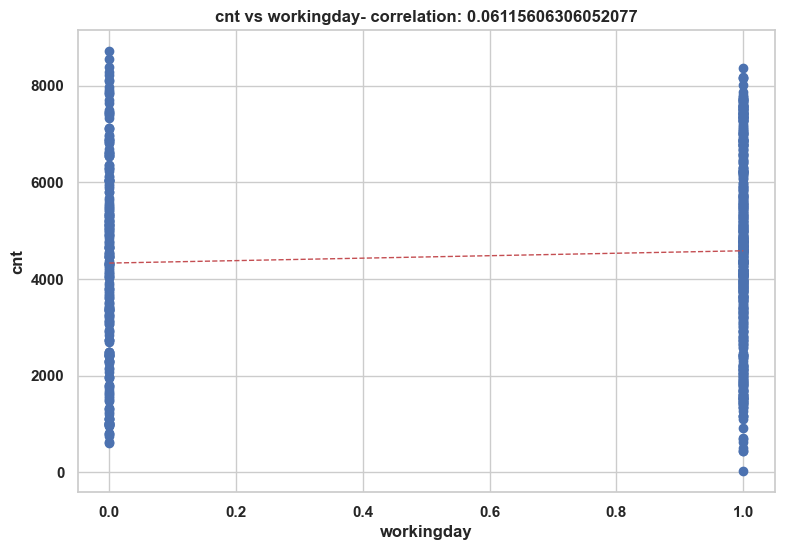

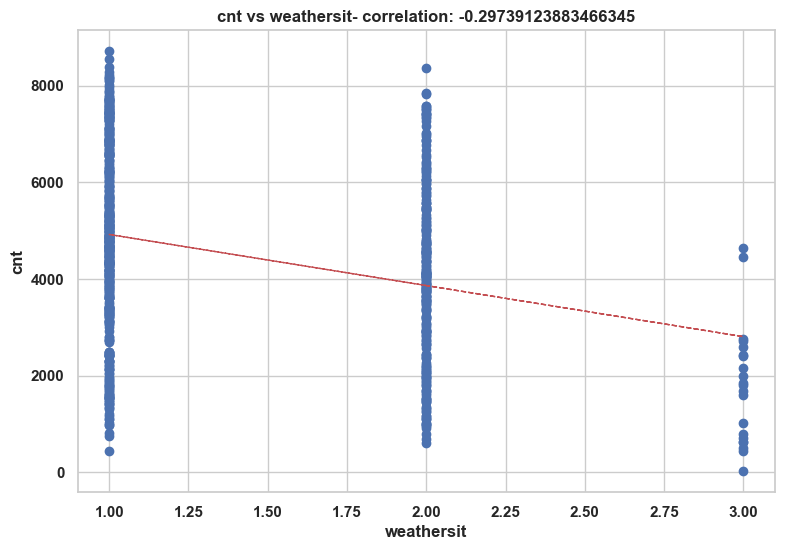

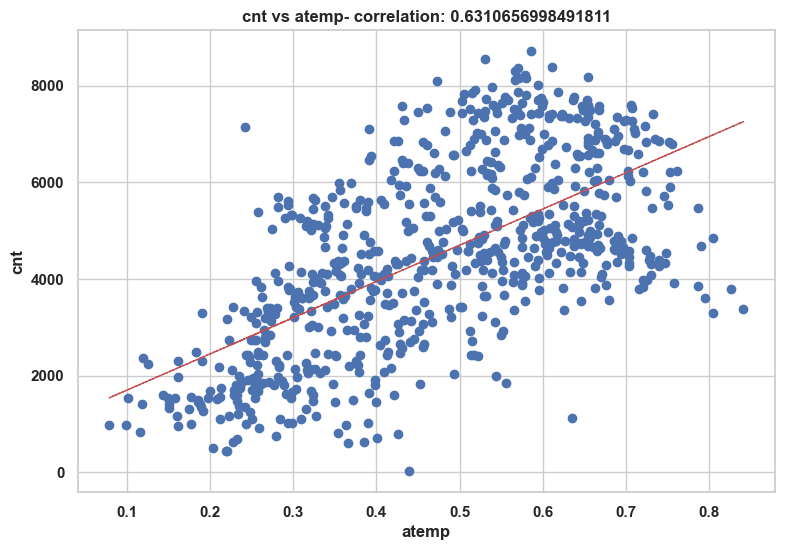

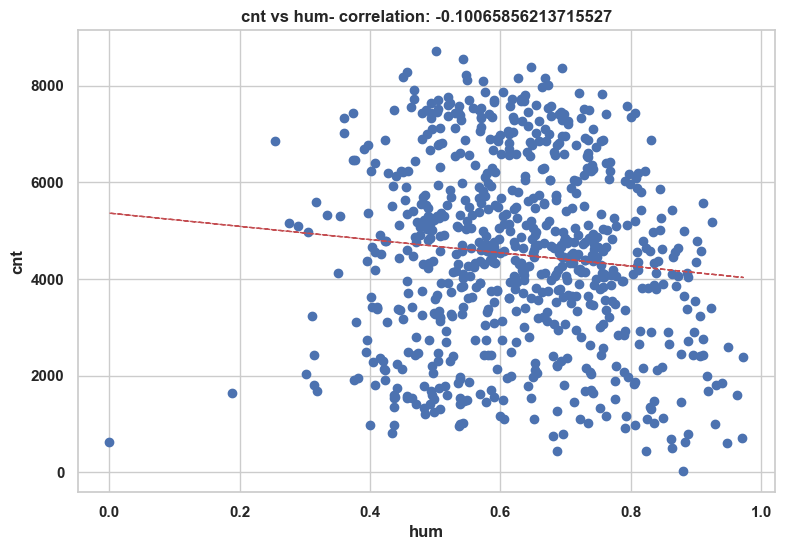

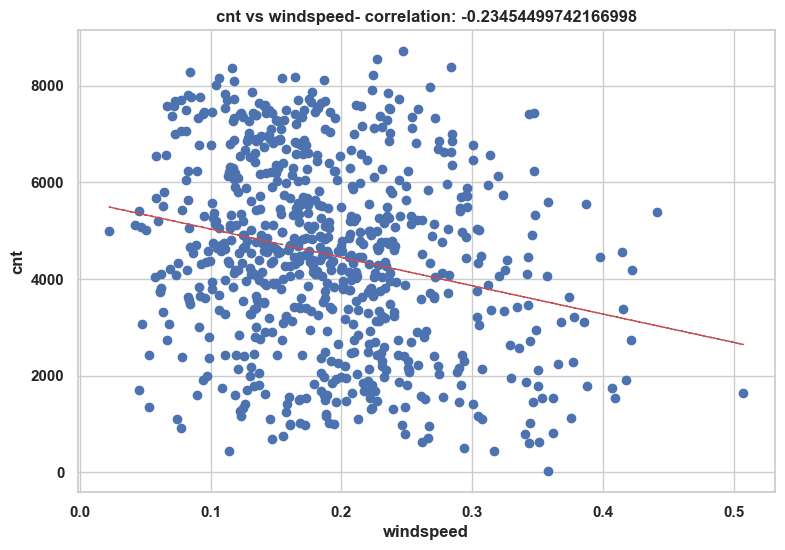

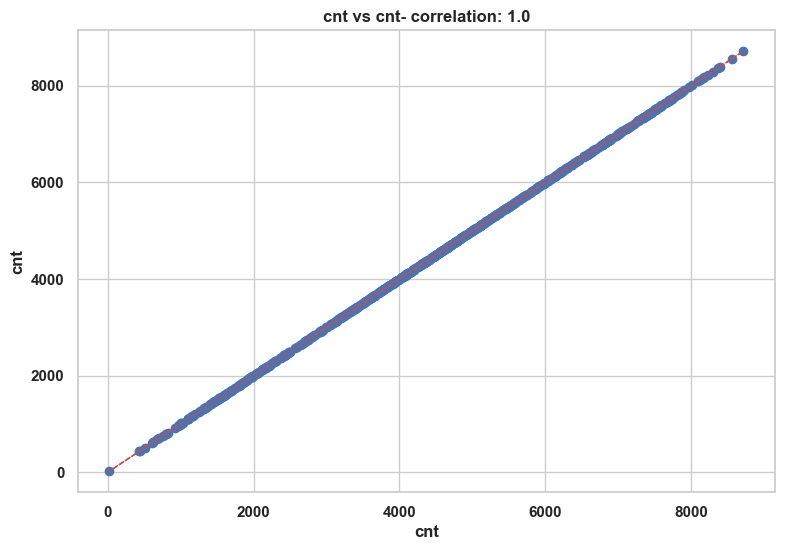

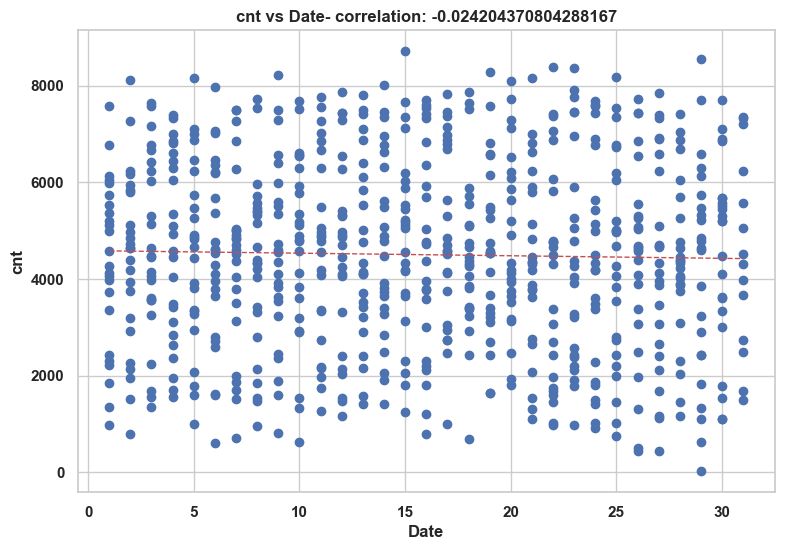

In [29]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('cnt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()